In [8]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
import numpy as np
%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [9]:
# Import the CSVs to Pandas DataFrames
transactions = Path("eth_all_transactions_transaction_costs.csv")
transactions_cost= pd.read_csv(transactions,infer_datetime_format=True,parse_dates=True)
transactions_cost["transaction_date"]=pd.to_datetime(transactions_cost["transaction_date"])
transactions_cost["transaction_date"]=transactions_cost["transaction_date"].dt.date
transactions_cost.rename(columns={"sum_daily_transaction_fees":"Sum of Daily Transactions", "total_daily_value":"Daily Sum of ETH"},inplace=True)
transactions_cost.set_index("transaction_date",inplace=True)
transactions_cost.sort_index(ascending=True,inplace=True)
transactions_cost.head(10)

Daily Sum of ETH  Sum of Daily Transactions
transaction_date                                             
2015-08-07            2.008723e+06                  37.318414
2015-08-08            1.358322e+07                  68.099970
2015-08-09            1.165455e+06                  14.098950
2015-08-10            1.670911e+06                  31.165144
2015-08-11            1.485732e+06                  11.311449
2015-08-12            7.474877e+05                  32.586992
2015-08-13            1.787854e+06                  24.929169
2015-08-14            2.295449e+06                  14.354834
2015-08-15            4.631282e+06                   8.836593
2015-08-16            1.708589e+06                   6.677238

Matplotlib(Figure, tight=True)
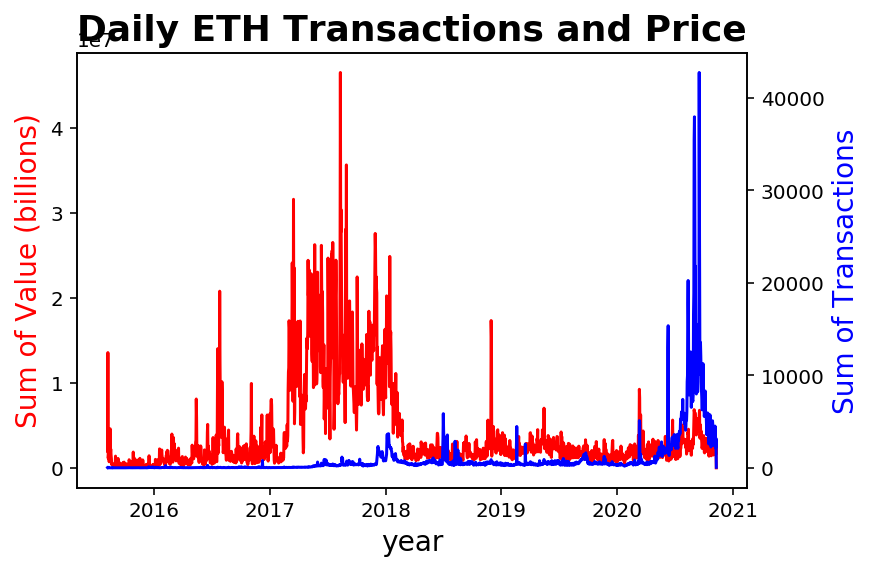

In [10]:
def transaction_cost():
    transactions = Path("eth_all_transactions_transaction_costs.csv")
    transactions_cost= pd.read_csv(transactions,infer_datetime_format=True,parse_dates=True)
    transactions_cost["transaction_date"]=pd.to_datetime(transactions_cost["transaction_date"])
    transactions_cost["transaction_date"]=transactions_cost["transaction_date"].dt.date
    transactions_cost.rename(columns={"sum_daily_transaction_fees":"Sum of Daily Transactions", "total_daily_value":"Daily Sum of ETH"},inplace=True)
    transactions_cost.set_index("transaction_date",inplace=True)
    transactions_cost.sort_index(ascending=True,inplace=True)
    fig,ax = plt.subplots()
    ax.plot(transactions_cost["Daily Sum of ETH"], color="red")
    ax.set_title("Daily ETH Transactions and Price", fontsize=18, fontweight="bold")
    ax.set_xlabel("year",fontsize=14)
    ax.set_ylabel("Sum of Value (billions)",color="red",fontsize=14)    
    ax2=ax.twinx()
    ax2.plot(transactions_cost["Sum of Daily Transactions"],color="blue")
    ax2.set_ylabel("Sum of Transactions",color="blue",fontsize=14)
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)

transaction_cost()

In [11]:
top_10 = transactions_cost.sort_values(by="Sum of Daily Transactions",ascending=False)
top_10.reset_index(inplace=True)
top_10.set_index('transaction_date', inplace=True, drop=True)
top_10.head(10)

Daily Sum of ETH  Sum of Daily Transactions
transaction_date                                             
2020-09-17            6.229640e+06               42763.252558
2020-09-02            6.602145e+06               37967.158998
2020-09-01            6.877648e+06               35517.224016
2020-09-03            6.446595e+06               30984.757578
2020-09-18            6.803064e+06               24732.127096
2020-09-05            6.386870e+06               21819.805283
2020-08-13            3.980493e+06               20263.769675
2020-08-31            5.536341e+06               18895.060102
2020-09-04            6.494007e+06               18017.476676
2020-08-12            4.197486e+06               17753.881328

In [12]:
def top_10_plot():
    top_10 = transactions_cost.sort_values(by="Sum of Daily Transactions",ascending=False)
    top_10.reset_index(inplace=True)
    top_10.set_index('transaction_date', inplace=True, drop=True)
    top_10.head(10)
    plot_top_10 = top_10["Sum of Daily Transactions"][:10].hvplot.bar(
        title="Top Ten Transactions For ETH in 2020", 
        xlabel="Transaction Date",
        ylabel="Transaction Fees",
        figsize=(12,8),
        rot=50)
    return plot_top_10

top_10_plot()

:Bars   [transaction_date]   (Sum of Daily Transactions)

In [13]:
price = Path("price_vol.csv")
price_data= pd.read_csv(price,index_col="price_date",infer_datetime_format=True).reset_index()
price_data.rename(columns={"eth_price":"ETH Close", "btc_price":"BTC Close", "eth_volume":"ETH Volume"},inplace=True)
price_data.sort_index(ascending=True,inplace=True)
def to_date_time(price_data):
    return dt.datetime.fromtimestamp(price_data).strftime("%Y-%m-%d")

price_data["price_date"]=pd.to_datetime(price_data["price_date"])
price_data["price_date"]=price_data["price_date"].dt.date
price_data.set_index("price_date",inplace=True)
price_btc_eth=price_data
price_btc_eth.drop(columns=["ETH Volume","btc_volume"],inplace=True)
#price_btc_eth.reset_index(inplace=True)
price_btc_eth.head()

ETH Close  BTC Close
price_date                      
2015-08-07   2.831620     135.30
2015-08-08   1.330750     141.96
2015-08-10   0.687586     135.30
2015-08-11   1.067379     117.00
2015-08-12   1.256613     103.43

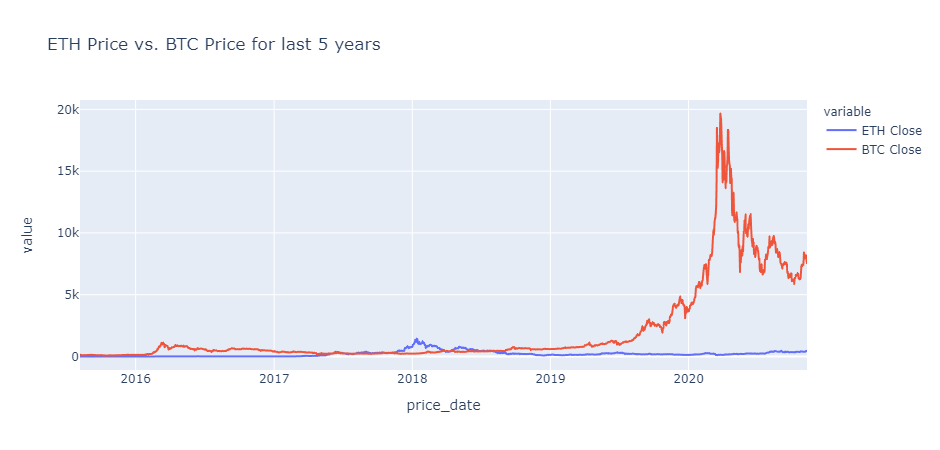

In [76]:
def eth_btc_plot():
    price = Path("price_vol.csv")
    price_data= pd.read_csv(price,index_col="price_date",infer_datetime_format=True).reset_index()
    price_data.rename(columns={"eth_price":"ETH Close", "btc_price":"BTC Close", "eth_volume":"ETH Volume"},inplace=True)
    price_data.sort_index(ascending=True,inplace=True)
    def to_date_time(price_data):
        return dt.datetime.fromtimestamp(price_data).strftime("%Y-%m-%d")
    price_data["price_date"]=pd.to_datetime(price_data["price_date"])
    price_data["price_date"]=price_data["price_date"].dt.date
    price_data.set_index("price_date",inplace=True)
    price_btc_eth=price_data
    price_btc_eth.drop(columns=["ETH Volume","btc_volume"],inplace=True)
    #price_btc_eth.reset_index(inplace=True)
    price_btc_eth.head()
    btc_eth_plot = px.line(price_btc_eth,
     title="ETH Price vs. BTC Price for last 5 years",
     labels={'x': 'Year', 'y': 'ETH & BTC Price'})
    return btc_eth_plot

eth_btc_plot()

In [15]:
def eth_price_5y_plot():
    price = Path("price_vol.csv")
    price_data= pd.read_csv(price,index_col="price_date",infer_datetime_format=True).reset_index()
    price_data.rename(columns={"eth_price":"ETH Close", "btc_price":"BTC Close", "eth_volume":"ETH Volume"},inplace=True)
    price_data.sort_index(ascending=True,inplace=True)
    def to_date_time(price_data):
        return dt.datetime.fromtimestamp(price_data).strftime("%Y-%m-%d")
    price_data["price_date"]=pd.to_datetime(price_data["price_date"])
    price_data["price_date"]=price_data["price_date"].dt.date
    price_data.set_index("price_date",inplace=True)
    price_data.head()
    eth_5y_plot = price_data["ETH Close"].hvplot.line(
        x="price_date",
        y="ETH Close",
        xlabel="Date",
        ylabel="ETH Price",
        title="ETH Price for last 5 years", 
        figsize=(15,10),
        rot=50)
    return eth_5y_plot

eth_price_5y_plot()

:Curve   [price_date]   (ETH Close)

In [16]:
df_price_cost=pd.concat([transactions_cost, price_data],axis="columns", join="inner")
df_price_cost.drop(columns=["BTC Close"],axis=1,inplace=True)
df_price_cost.head()

Daily Sum of ETH  Sum of Daily Transactions  ETH Close
2015-08-07      2.008723e+06                  37.318414   2.831620
2015-08-08      1.358322e+07                  68.099970   1.330750
2015-08-10      1.670911e+06                  31.165144   0.687586
2015-08-11      1.485732e+06                  11.311449   1.067379
2015-08-12      7.474877e+05                  32.586992   1.256613

Matplotlib(Figure, tight=True)
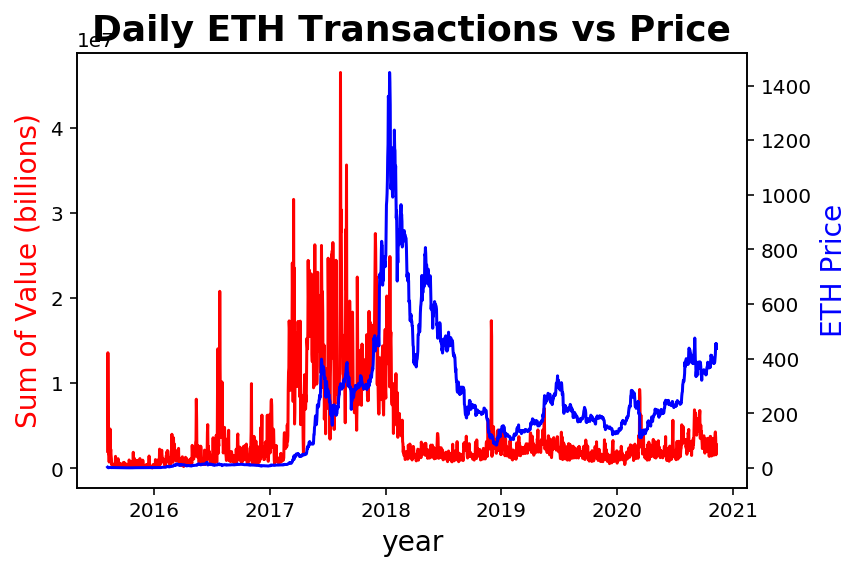

In [17]:
def eth_trans_plus_price():
    df_price_cost=pd.concat([transactions_cost, price_data],axis="columns", join="inner")
    df_price_cost.drop(columns=["BTC Close"],axis=1,inplace=True)
    df_price_cost.head()
    #df_price_cost.hvplot.step(y=["total_daily_value","eth_price"],ylabel="Total Daily Transfers",xlabel="ETH Price",figsize=(15,))
    df_price_cost.reset_index(inplace=True)
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(df_price_cost["index"], df_price_cost["Daily Sum of ETH"], color="red")
    ax.set_title("Daily ETH Transactions vs Price", fontsize=18, fontweight="bold")
    # set x-axis label
    ax.set_xlabel("year",fontsize=14)
    # set y-axis label
    ax.set_ylabel("Sum of Value (billions)",color="red",fontsize=14)    
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df_price_cost["index"], df_price_cost["ETH Close"],color="blue")
    ax2.set_ylabel("ETH Price",color="blue",fontsize=14)
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)

eth_trans_plus_price()

In [18]:
SP500_DATA = Path("SP500.csv")
SP500 = pd.read_csv(SP500_DATA, infer_datetime_format=True)
SP500["Date"]= pd.to_datetime(SP500["Date"])
SP500["Date"]=SP500["Date"].dt.date
SP500.set_index("Date", inplace = True)
SP500_Close = SP500.rename(columns={'Close' : 'SP500 Close'})
SP500_Close.head()

SP500 Close
Date                   
2015-08-03      2098.04
2015-08-04      2093.32
2015-08-05      2099.84
2015-08-06      2083.56
2015-08-07      2077.57

In [19]:
Oil_Price_DATA = Path("OilPricePerBarrelHistoricalQuotes.csv")
Oil_USD = pd.read_csv(Oil_Price_DATA, infer_datetime_format=True)
Oil_USD.drop(columns=[' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
Oil_USD = Oil_USD.rename(columns={' Close/Last': 'Close'})
Oil_USD["Date"]= pd.to_datetime(Oil_USD["Date"])
Oil_USD["Date"]=Oil_USD["Date"].dt.date
Oil_USD.set_index("Date", inplace = True)
Oil = Oil_USD.rename(columns={'Close' : 'OIL Close'})
Oil.head()

OIL Close
Date                 
2020-11-06      37.14
2020-11-05      38.79
2020-11-04      39.15
2020-11-03      37.66
2020-11-02      36.81

In [20]:
# Gold Price
GOLD_DATA = Path("GoldPricePerOunceHistoricalQuotes.csv")
GOLD = pd.read_csv(GOLD_DATA)
GOLD[" Date"]= pd.to_datetime(GOLD["Date"])
GOLD[" Date"]=GOLD[" Date"].dt.date
GOLD.set_index(" Date", inplace = True)
GOLD = GOLD.rename(columns={' Close/Last': 'Gold Close'})
GOLD.drop(columns=['Date',' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
GOLD.head()

Gold Close
 Date                 
2020-11-06      1951.7
2020-11-05      1946.8
2020-11-04      1896.2
2020-11-03      1910.4
2020-11-02      1892.5

In [21]:
price_data["ETH Close"]

price_date
2015-08-07      2.831620
2015-08-08      1.330750
2015-08-10      0.687586
2015-08-11      1.067379
2015-08-12      1.256613
2015-08-13      1.825395
2015-08-14      1.825975
2015-08-15      1.670950
2015-08-16      1.476607
2015-08-17      1.203871
2015-08-18      1.281393
2015-08-19      1.252739
2015-08-20      1.484195
2015-08-21      1.406315
2015-08-22      1.380722
2015-08-23      1.355182
2015-08-24      1.246572
2015-08-25      1.160828
2015-08-26      1.119639
2015-08-27      1.133691
2015-08-28      1.188896
2015-08-29      1.174344
2015-08-30      1.322351
2015-08-31      1.353368
2015-09-01      1.350787
2015-09-02      1.278811
2015-09-03      1.262771
2015-09-04      1.269520
2015-09-05      1.334976
2015-09-06      1.298883
                 ...    
2020-10-12    374.497015
2020-10-13    387.255558
2020-10-14    381.168774
2020-10-15    379.210254
2020-10-16    377.158681
2020-10-17    365.990642
2020-10-18    368.650470
2020-10-19    378.049365
2020-10-20    

In [22]:
df_assets=pd.concat([SP500_Close, Oil, GOLD, price_data],axis="columns",join="inner")
df_assets.drop(columns=["BTC Close"],axis=1,inplace=True)
df_assets.head()

SP500 Close  OIL Close  Gold Close  ETH Close
2015-11-09      2078.58      43.87      1088.1   0.995803
2015-11-10      2081.72      44.21      1088.5   0.934834
2015-11-11      2075.00      42.93      1084.9   0.788761
2015-11-12      2045.97      41.75      1081.0   0.900742
2015-11-13      2023.04      40.74      1080.9   0.904082

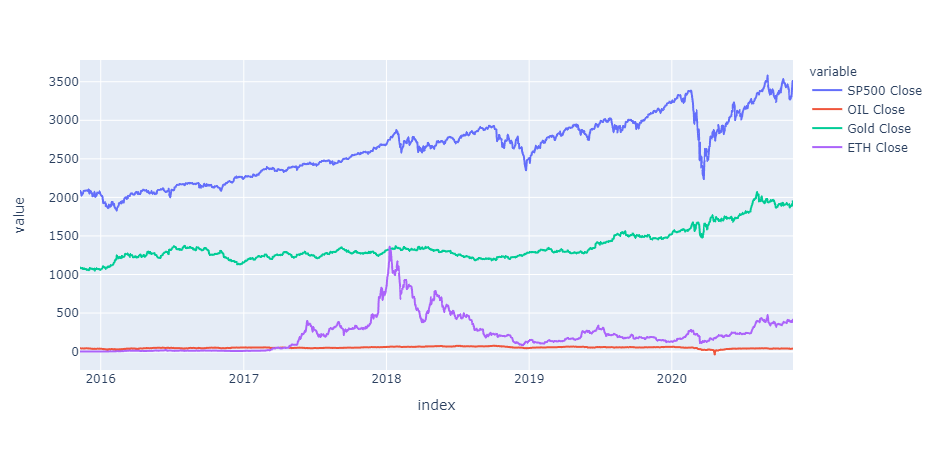

In [70]:
def eth_vs_other_plot():
    SP500_DATA = Path("SP500.csv")
    SP500 = pd.read_csv(SP500_DATA, infer_datetime_format=True)
    SP500["Date"]= pd.to_datetime(SP500["Date"])
    SP500["Date"]=SP500["Date"].dt.date
    SP500.set_index("Date", inplace = True)
    SP500_Close = SP500.rename(columns={'Close' : 'SP500 Close'})
    Oil_Price_DATA = Path("OilPricePerBarrelHistoricalQuotes.csv")
    Oil_USD = pd.read_csv(Oil_Price_DATA, infer_datetime_format=True)
    Oil_USD.drop(columns=[' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
    Oil_USD = Oil_USD.rename(columns={' Close/Last': 'Close'})
    Oil_USD["Date"]= pd.to_datetime(Oil_USD["Date"])
    Oil_USD["Date"]=Oil_USD["Date"].dt.date
    Oil_USD.set_index("Date", inplace = True)
    Oil = Oil_USD.rename(columns={'Close' : 'OIL Close'})
    GOLD_DATA = Path("GoldPricePerOunceHistoricalQuotes.csv")
    GOLD = pd.read_csv(GOLD_DATA)
    GOLD[" Date"]= pd.to_datetime(GOLD["Date"])
    GOLD[" Date"]=GOLD[" Date"].dt.date
    GOLD.set_index(" Date", inplace = True)
    GOLD = GOLD.rename(columns={' Close/Last': 'Gold Close'})
    GOLD.drop(columns=['Date',' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
    df_assets=pd.concat([SP500_Close, Oil, GOLD, price_data],axis="columns",join="inner")
    df_assets.drop(columns=["BTC Close"],axis=1,inplace=True)
    eth_vs_oth_plot = px.line(df_assets)
    return eth_vs_oth_plot

eth_vs_other_plot()

In [24]:
# Mining Difficulty 
Mining_Difficulty_DATA = Path("mining_difficulty_sum_daily_2015_to_current.csv")
Mining_Difficulty1 = pd.read_csv(Mining_Difficulty_DATA)
Mining_Difficulty2 = Mining_Difficulty1.rename(columns={'f0_' : 'Date' , 'f1_' : 'Mining Difficulty'})
Mining_Difficulty2["Date"]= pd.to_datetime(Mining_Difficulty2["Date"])
Mining_Difficulty2["Date"]=Mining_Difficulty2["Date"].dt.date
Mining_Difficulty2.sort_values(by=['Date'], inplace=True)
Mining_Difficulty2.set_index("Date", inplace = True)
Mining_Difficulty= Mining_Difficulty2['Mining Difficulty'].astype('float64')
Mining_Difficulty.head()

Date
2015-07-30    8.385496e+14
2015-07-31    4.137990e+15
2015-08-01    4.696236e+15
2015-08-02    5.466519e+15
2015-08-03    5.944421e+15
Name: Mining Difficulty, dtype: float64

Matplotlib(Figure, tight=True)
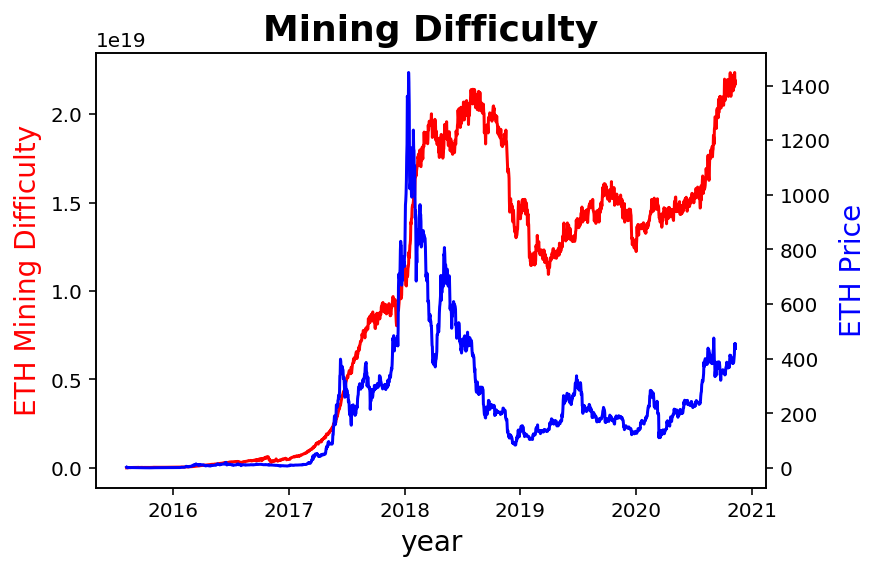

In [61]:
def mining_difficulty_plot(): 
    Mining_Difficulty_DATA = Path("mining_difficulty_sum_daily_2015_to_current.csv")
    Mining_Difficulty1 = pd.read_csv(Mining_Difficulty_DATA)
    Mining_Difficulty2 = Mining_Difficulty1.rename(columns={'f0_' : 'Date' , 'f1_' : 'Mining Difficulty'})
    Mining_Difficulty2["Date"]= pd.to_datetime(Mining_Difficulty2["Date"])
    Mining_Difficulty2["Date"]=Mining_Difficulty2["Date"].dt.date
    Mining_Difficulty2.sort_values(by=['Date'], inplace=True)
    Mining_Difficulty2.set_index("Date", inplace = True)
    Mining_Difficulty= Mining_Difficulty2['Mining Difficulty'].astype('float64')
    Mining_Difficulty.head()
    Price_and_Volume = Path("price_vol.csv")
    Price = pd.read_csv(Price_and_Volume)
    Price["price_date"]= pd.to_datetime(Price["price_date"])
    Price["price_date"]=Price["price_date"].dt.date
    Price_close = Price.rename(columns={'price_date': 'Date',
                                   'eth_price' : 'ETH Close',
                                   'btc_price' : 'BTC Close'})
    Price_close.set_index("Date", inplace = True)
    ETH_price = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_price.sort_values(by=['Date'], inplace=True)
    ETH_price['ETH Close'].astype('float64')   
    ETH_MiningDifficulty = pd.concat([Mining_Difficulty,ETH_price], axis='columns', join = 'inner')
    ETH_MiningDifficulty.reset_index(inplace=True)
    fig,ax= plt.subplots()
    ax.plot(ETH_MiningDifficulty["Date"], ETH_MiningDifficulty["Mining Difficulty"], color="red")
    ax.set_title("Mining Difficulty", fontsize=18, fontweight="bold")
    ax.set_xlabel('year' , fontsize=14)
    ax.set_ylabel('ETH Mining Difficulty',color='red',fontsize=14)
    ax2=ax.twinx()
    ax2.plot(ETH_MiningDifficulty['Date'], ETH_MiningDifficulty['ETH Close'],color='blue')
    ax2.set_ylabel('ETH Price',color='blue',fontsize=14)
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)

mining_difficulty_plot()

In [26]:
Price_and_Volume = Path("price_vol.csv")
Price = pd.read_csv(Price_and_Volume)
Price["price_date"]= pd.to_datetime(Price["price_date"])
Price["price_date"]=Price["price_date"].dt.date
Price_close = Price.rename(columns={'price_date': 'Date',
                                   'eth_price' : 'ETH Close',
                                   'btc_price' : 'BTC Close'})
Price_close.set_index("Date", inplace = True)
ETH_price = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
ETH_price.sort_values(by=['Date'], inplace=True)
ETH_price['ETH Close'].astype('float64')
ETH_MiningDifficulty = pd.concat([Mining_Difficulty,ETH_price], axis='columns', join = 'inner')




In [27]:
ETH_Mining_Difficulty_Pct = ETH_MiningDifficulty.pct_change()
ETH_Mining_Difficulty_Pct.head()

Mining Difficulty  ETH Close
Date                                    
2015-08-07                NaN        NaN
2015-08-08           0.092304  -0.530039
2015-08-10           0.158388  -0.483310
2015-08-11           0.113394   0.552358
2015-08-12           0.051797   0.177289

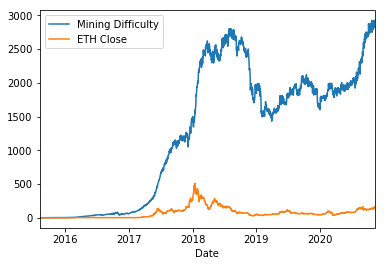

In [28]:
def cumulative_returns_plot():
    ETH_MiningDifficulty = pd.concat([Mining_Difficulty,ETH_price], axis='columns', join = 'inner')
    ETH_MiningDifficulty.reset_index(inplace=True)
    ETH_MiningDifficulty.set_index('Date', inplace=True)
    ETH_Mining_Difficulty_Pct = ETH_MiningDifficulty.pct_change()
    cumulative_returns = (1+ETH_Mining_Difficulty_Pct).cumprod()-1
    fig_cum_return = cumulative_returns.plot()
    return fig_cum_return

cumulative_returns_plot()

In [29]:
ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
ETH_Close.sort_values(by=['Date'], inplace=True)
BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
BTC_Close.sort_values(by=['Date'], inplace=True)
BTC_Close.head()

BTC Close
Date                 
2015-08-07     135.30
2015-08-08     141.96
2015-08-10     135.30
2015-08-11     117.00
2015-08-12     103.43

In [30]:
#Euro Price
EUR_USD_DATA = Path("EURUSD=X.csv")
EUR_USD = pd.read_csv(EUR_USD_DATA)
EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
EUR_USD["Date"]=EUR_USD["Date"].dt.date
EUR_USD.set_index("Date", inplace = True)
EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})

# Pound Price
GBP_USD_DATA = Path("GBPUSD=X.csv")
GBP_USD = pd.read_csv(GBP_USD_DATA)
GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
GBP_USD["Date"]=GBP_USD["Date"].dt.date
GBP_USD.set_index("Date", inplace = True)
GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
# Yen Price
JPY_USD_DATA = Path("JPYUSD=X.csv")
JPY_USD = pd.read_csv(JPY_USD_DATA)
JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
JPY_USD["Date"]=JPY_USD["Date"].dt.date
JPY_USD.set_index("Date", inplace = True)
JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
JPY.head()

JPY Close
Date                 
2015-11-11   0.008125
2015-11-12   0.008146
2015-11-13   0.008159
2015-11-16   0.008172
2015-11-17   0.008113

In [32]:
combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
pct_change = combined_df.pct_change()
pct_change_correlation = pct_change.corr()
pct_change_correlation

EUR Close  GBP Close  JPY Close  Gold Close  SP500 Close  \
EUR Close     1.000000   0.545577   0.408183    0.077531     0.074823   
GBP Close     0.545577   1.000000   0.122041    0.008598     0.041444   
JPY Close     0.408183   0.122041   1.000000    0.138050     0.029184   
Gold Close    0.077531   0.008598   0.138050    1.000000     0.020451   
SP500 Close   0.074823   0.041444   0.029184    0.020451     1.000000   
ETH Close     0.020355   0.028168   0.002817    0.050899    -0.039669   
BTC Close    -0.083273  -0.054276  -0.034228   -0.013967    -0.077452   

             ETH Close  BTC Close  
EUR Close     0.020355  -0.083273  
GBP Close     0.028168  -0.054276  
JPY Close     0.002817  -0.034228  
Gold Close    0.050899  -0.013967  
SP500 Close  -0.039669  -0.077452  
ETH Close     1.000000   0.037250  
BTC Close     0.037250   1.000000

Text(0.5, 1.0, 'Heatmap of Pct Change Correlation')

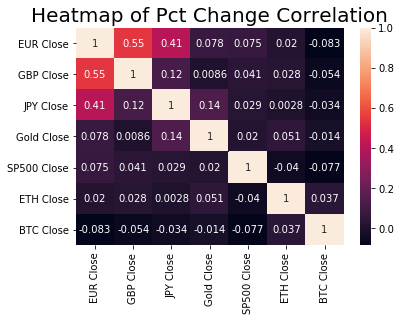

In [33]:
sns.heatmap(pct_change_correlation, annot=True)
plt.title('Heatmap of Pct Change Correlation', fontsize = 20)

Matplotlib(Figure)
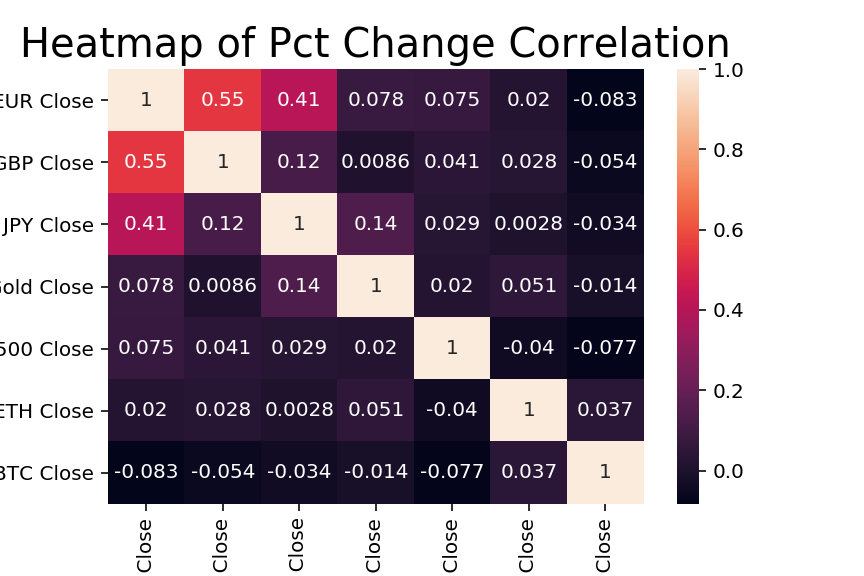

In [34]:
def pct_change_heatmap():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    BTC_Close.sort_values(by=['Date'], inplace=True)
    EUR_USD_DATA = Path("EURUSD=X.csv")
    EUR_USD = pd.read_csv(EUR_USD_DATA)
    EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
    EUR_USD["Date"]=EUR_USD["Date"].dt.date
    EUR_USD.set_index("Date", inplace = True)
    EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})
    GBP_USD_DATA = Path("GBPUSD=X.csv")
    GBP_USD = pd.read_csv(GBP_USD_DATA)
    GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
    GBP_USD["Date"]=GBP_USD["Date"].dt.date
    GBP_USD.set_index("Date", inplace = True)
    GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
    JPY_USD_DATA = Path("JPYUSD=X.csv")
    JPY_USD = pd.read_csv(JPY_USD_DATA)
    JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
    JPY_USD["Date"]=JPY_USD["Date"].dt.date
    JPY_USD.set_index("Date", inplace = True)
    JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    pct_change_correlation = pct_change.corr()
    fig = plt.figure()
    heatmap = sns.heatmap(pct_change_correlation, annot=True)
    plt.title('Heatmap of Pct Change Correlation', fontsize = 20)
    plt.close(fig)
    return pn.pane.Matplotlib(fig)

pct_change_heatmap()

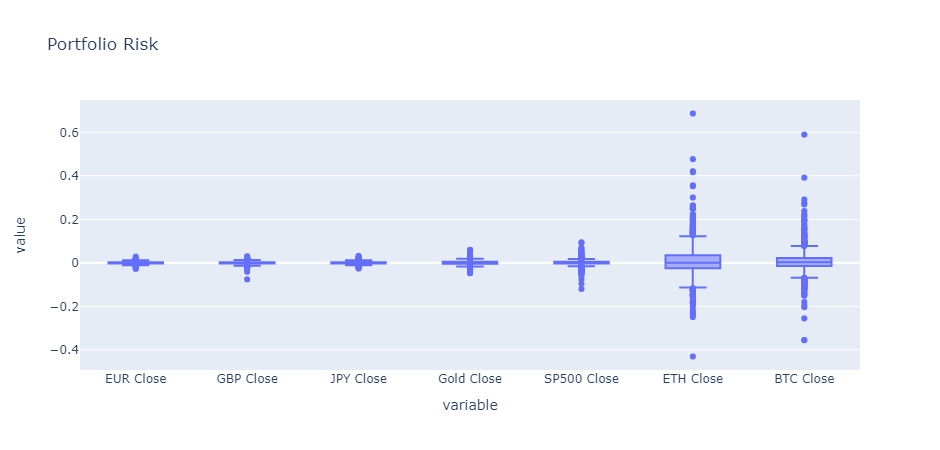

In [57]:
def boxplot():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    BTC_Close.sort_values(by=['Date'], inplace=True)
    EUR_USD_DATA = Path("EURUSD=X.csv")
    EUR_USD = pd.read_csv(EUR_USD_DATA)
    EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
    EUR_USD["Date"]=EUR_USD["Date"].dt.date
    EUR_USD.set_index("Date", inplace = True)
    EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})
    GBP_USD_DATA = Path("GBPUSD=X.csv")
    GBP_USD = pd.read_csv(GBP_USD_DATA)
    GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
    GBP_USD["Date"]=GBP_USD["Date"].dt.date
    GBP_USD.set_index("Date", inplace = True)
    GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
    JPY_USD_DATA = Path("JPYUSD=X.csv")
    JPY_USD = pd.read_csv(JPY_USD_DATA)
    JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
    JPY_USD["Date"]=JPY_USD["Date"].dt.date
    JPY_USD.set_index("Date", inplace = True)
    JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    pct_chg_bxplt = px.box(pct_change, title="Portfolio Risk")

    return pct_chg_bxplt

boxplot()

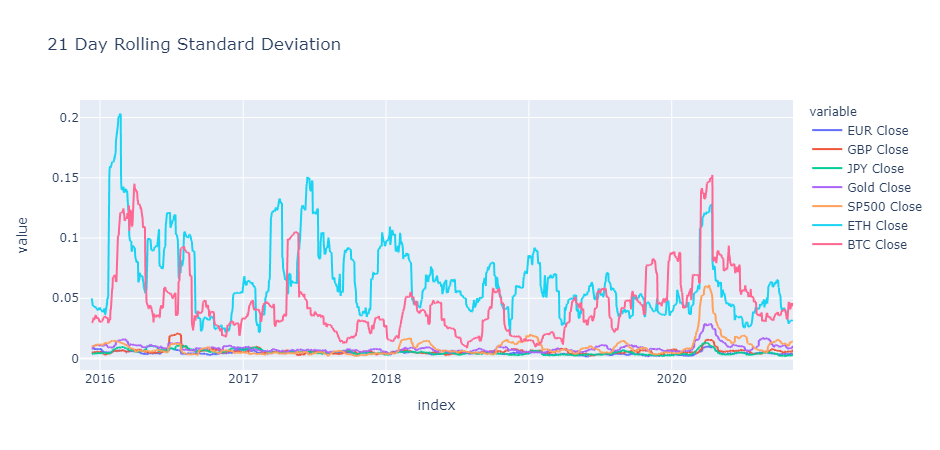

In [56]:
def std_rolling():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    BTC_Close.sort_values(by=['Date'], inplace=True)
    EUR_USD_DATA = Path("EURUSD=X.csv")
    EUR_USD = pd.read_csv(EUR_USD_DATA)
    EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
    EUR_USD["Date"]=EUR_USD["Date"].dt.date
    EUR_USD.set_index("Date", inplace = True)
    EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})
    GBP_USD_DATA = Path("GBPUSD=X.csv")
    GBP_USD = pd.read_csv(GBP_USD_DATA)
    GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
    GBP_USD["Date"]=GBP_USD["Date"].dt.date
    GBP_USD.set_index("Date", inplace = True)
    GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
    JPY_USD_DATA = Path("JPYUSD=X.csv")
    JPY_USD = pd.read_csv(JPY_USD_DATA)
    JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
    JPY_USD["Date"]=JPY_USD["Date"].dt.date
    JPY_USD.set_index("Date", inplace = True)
    JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    pct_change.std()
    ETH_risk = pct_change["ETH Close"].std()
    pct_change.std() > ETH_risk
    annual_std = pct_change.std() * np.sqrt(252)
    assets_roll_std = pct_change.rolling(window=21).std()
    twenty_one_day_plot = px.line(assets_roll_std, title="21 Day Rolling Standard Deviation")
    return twenty_one_day_plot 

std_rolling()

Matplotlib(Figure, tight=True)
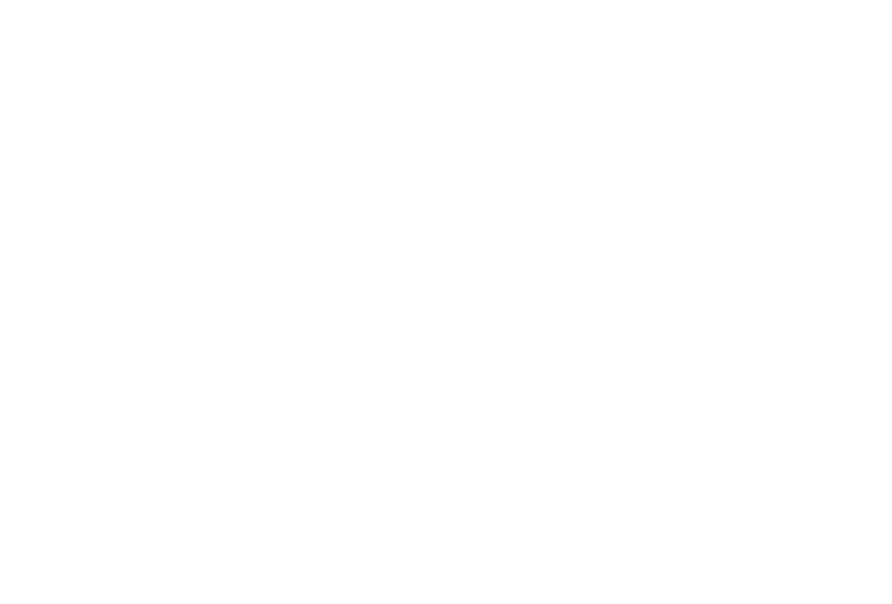

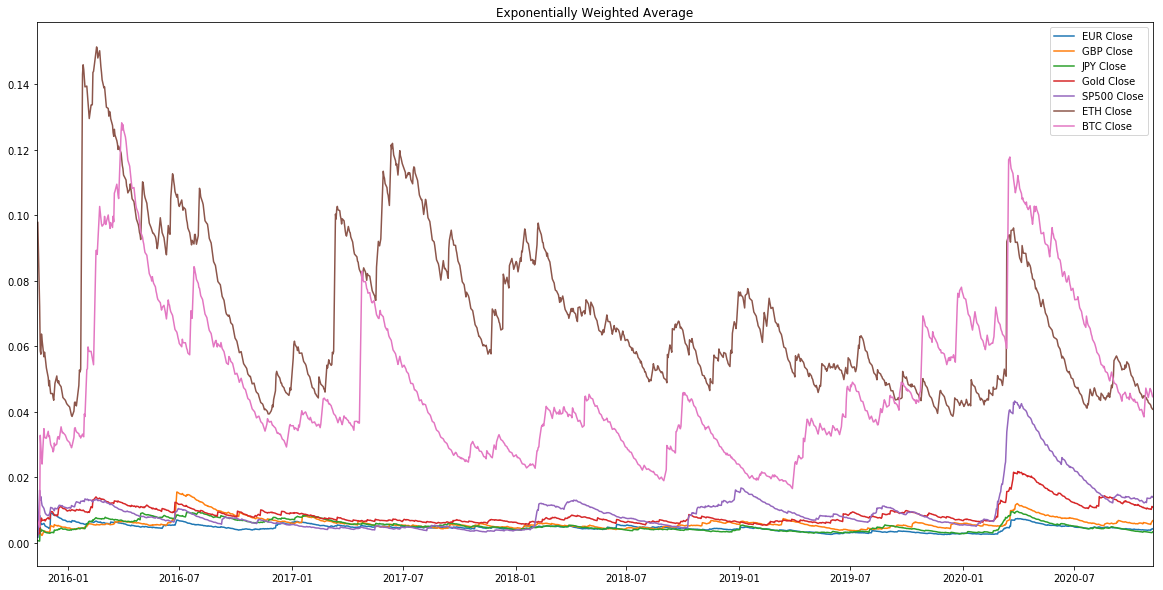

In [37]:
def ewm():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    BTC_Close.sort_values(by=['Date'], inplace=True)
    EUR_USD_DATA = Path("EURUSD=X.csv")
    EUR_USD = pd.read_csv(EUR_USD_DATA)
    EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
    EUR_USD["Date"]=EUR_USD["Date"].dt.date
    EUR_USD.set_index("Date", inplace = True)
    EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})
    GBP_USD_DATA = Path("GBPUSD=X.csv")
    GBP_USD = pd.read_csv(GBP_USD_DATA)
    GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
    GBP_USD["Date"]=GBP_USD["Date"].dt.date
    GBP_USD.set_index("Date", inplace = True)
    GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
    JPY_USD_DATA = Path("JPYUSD=X.csv")
    JPY_USD = pd.read_csv(JPY_USD_DATA)
    JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
    JPY_USD["Date"]=JPY_USD["Date"].dt.date
    JPY_USD.set_index("Date", inplace = True)
    JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    pct_change.std()
    ETH_risk = pct_change["ETH Close"].std()
    pct_change.std() > ETH_risk
    annual_std = pct_change.std() * np.sqrt(252)
    assets_roll_std = pct_change.rolling(window=21).std()
    fig = plt.figure()
    ewm_plot = pct_change.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)
    
ewm()

Matplotlib(Figure, tight=True)
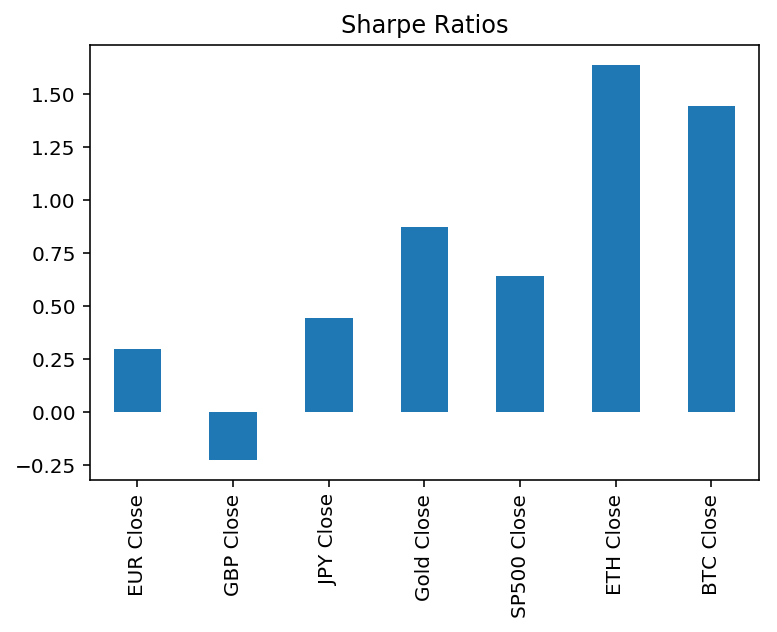

In [38]:
def sharpe_ratios():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    BTC_Close.sort_values(by=['Date'], inplace=True)
    EUR_USD_DATA = Path("EURUSD=X.csv")
    EUR_USD = pd.read_csv(EUR_USD_DATA)
    EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
    EUR_USD["Date"]=EUR_USD["Date"].dt.date
    EUR_USD.set_index("Date", inplace = True)
    EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})
    GBP_USD_DATA = Path("GBPUSD=X.csv")
    GBP_USD = pd.read_csv(GBP_USD_DATA)
    GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
    GBP_USD["Date"]=GBP_USD["Date"].dt.date
    GBP_USD.set_index("Date", inplace = True)
    GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
    JPY_USD_DATA = Path("JPYUSD=X.csv")
    JPY_USD = pd.read_csv(JPY_USD_DATA)
    JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
    JPY_USD["Date"]=JPY_USD["Date"].dt.date
    JPY_USD.set_index("Date", inplace = True)
    JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
    combined_df = pd.concat([EUR, GBP, JPY, GOLD, SP500_Close, ETH_Close, BTC_Close], axis="columns", join="inner")
    pct_change = combined_df.pct_change()
    sharpe_ratios = (pct_change.mean() * 252) / (pct_change.std() * np.sqrt(252))
    fig = plt.figure()
    sr_plot = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)
    

sharpe_ratios()

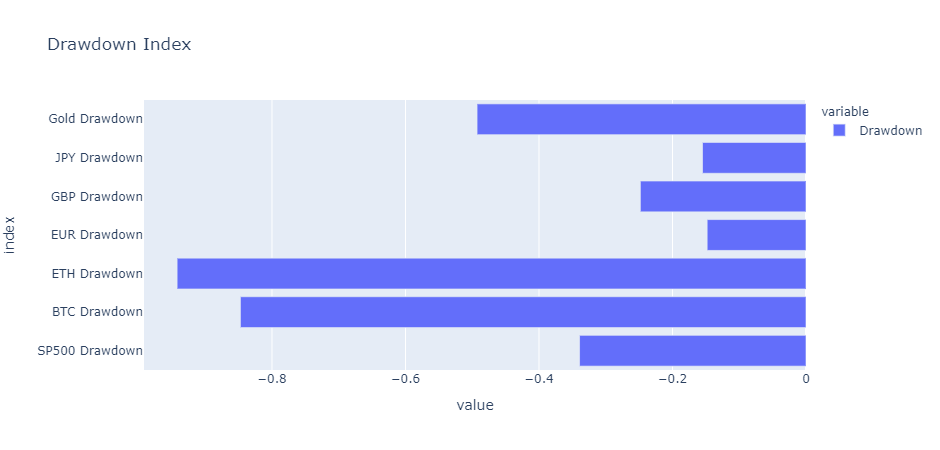

In [55]:
def drawdown():
    ETH_Close = Price_close.drop(columns=['BTC Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    ETH_Close.sort_values(by=['Date'], inplace=True)
    BTC_Close = Price_close.drop(columns=['ETH Close', 'eth_volume', 'btc_volume'], axis='1', inplace=False)
    BTC_Close.sort_values(by=['Date'], inplace=True)
    EUR_USD_DATA = Path("EURUSD=X.csv")
    EUR_USD = pd.read_csv(EUR_USD_DATA)
    EUR_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    EUR_USD["Date"]= pd.to_datetime(EUR_USD["Date"])
    EUR_USD["Date"]=EUR_USD["Date"].dt.date
    EUR_USD.set_index("Date", inplace = True)
    EUR = EUR_USD.rename(columns={'Close' : 'EUR Close'})
    GBP_USD_DATA = Path("GBPUSD=X.csv")
    GBP_USD = pd.read_csv(GBP_USD_DATA)
    GBP_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    GBP_USD["Date"]= pd.to_datetime(GBP_USD["Date"])
    GBP_USD["Date"]=GBP_USD["Date"].dt.date
    GBP_USD.set_index("Date", inplace = True)
    GBP = GBP_USD.rename(columns={'Close' : 'GBP Close'})
    JPY_USD_DATA = Path("JPYUSD=X.csv")
    JPY_USD = pd.read_csv(JPY_USD_DATA)
    JPY_USD.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], axis = '1', inplace=True)
    JPY_USD["Date"]= pd.to_datetime(JPY_USD["Date"])
    JPY_USD["Date"]=JPY_USD["Date"].dt.date
    JPY_USD.set_index("Date", inplace = True)
    JPY = JPY_USD.rename(columns={'Close' : 'JPY Close'})
    GOLD_DATA = Path("GoldPricePerOunceHistoricalQuotes.csv")
    GOLD = pd.read_csv(GOLD_DATA)
    GOLD[" Date"]= pd.to_datetime(GOLD["Date"])
    GOLD[" Date"]=GOLD[" Date"].dt.date
    GOLD.set_index(" Date", inplace = True)
    GOLD = GOLD.rename(columns={' Close/Last': 'Gold Close'})
    GOLD.drop(columns=['Date',' Volume', ' Open', ' High', ' Low'], axis='1', inplace=True)
    SP500_DATA = Path("SP500.csv")
    SP500 = pd.read_csv(SP500_DATA, infer_datetime_format=True)
    SP500["Date"]= pd.to_datetime(SP500["Date"])
    SP500["Date"]=SP500["Date"].dt.date
    SP500.set_index("Date", inplace = True)
    SP500_Close = SP500.rename(columns={'Close' : 'SP500 Close'})
    DD_SP500 = SP500_Close
    DD_SP500.head()
    DD_SP500['SP500 HighValue'] = DD_SP500['SP500 Close'].cummax()
    DD_SP500['SP500 Drawdown'] = DD_SP500['SP500 Close'] / DD_SP500['SP500 HighValue'] -1
    greatest_SP500_dd = DD_SP500['SP500 Drawdown'].min()
    DD_BTC = BTC_Close
    DD_BTC['BTC HighValue'] = DD_BTC['BTC Close'].cummax()
    DD_BTC['BTC Drawdown'] = DD_BTC['BTC Close'] / DD_BTC['BTC HighValue'] -1
    greatest_BTC_dd = DD_BTC['BTC Drawdown'].min()
    DD_EUR = EUR
    DD_EUR['EUR HighValue'] = DD_EUR['EUR Close'].cummax()
    DD_EUR['EUR Drawdown'] = DD_EUR['EUR Close'] / DD_EUR['EUR HighValue'] -1
    greatest_EUR_dd = DD_EUR['EUR Drawdown'].min()
    DD_GBP = GBP
    DD_GBP['GBP HighValue'] = DD_GBP['GBP Close'].cummax()
    DD_GBP['GBP Drawdown'] = DD_GBP['GBP Close'] / DD_GBP['GBP HighValue'] -1
    greatest_GBP_dd = DD_GBP['GBP Drawdown'].min()
    DD_JPY = JPY
    DD_JPY['JPY HighValue'] = DD_JPY['JPY Close'].cummax()
    DD_JPY['JPY Drawdown'] = DD_JPY['JPY Close'] / DD_JPY['JPY HighValue'] -1
    greatest_JPY_dd = DD_JPY['JPY Drawdown'].min()
    DD_ETH = ETH_Close
    DD_ETH['ETH HighValue'] = DD_ETH['ETH Close'].cummax()
    DD_ETH['ETH Drawdown'] = DD_ETH['ETH Close'] / DD_ETH['ETH HighValue'] -1
    greatest_ETH_dd = DD_ETH['ETH Drawdown'].min()
    DD_GOLD = GOLD
    DD_GOLD['Gold HighValue'] = DD_GOLD['Gold Close'].cummax()
    DD_GOLD['Gold Drawdown'] =  DD_GOLD['Gold Close'] / DD_GOLD['Gold HighValue'] -1
    greatest_GOLD_dd = DD_GOLD['Gold Drawdown'].min()
    Drawdown = [-0.3392495902426059,-0.8473121646192736,-0.9421439618188613,-0.14809420615970725,-0.24815184017979908,-0.15506044559896104,-0.49279984536580657]
    index = ['SP500 Drawdown','BTC Drawdown',
            'ETH Drawdown','EUR Drawdown', 'GBP Drawdown',
            'JPY Drawdown','Gold Drawdown']
    DDDD = pd.DataFrame({"Drawdown" : Drawdown}, index = index)
    drawdown_plot = px.bar(DDDD, title = "Drawdown Index", orientation='h')
    return drawdown_plot
    

drawdown()

In [77]:
# Create a title for the Dashboard
title = pn.pane.Markdown(
    """
##A small view into the world of Ethereum ("ETH")
""",
    width=800,
)

welcome = pn.pane.Markdown(
    """
A presentation to indruce you to Ethereum.
""")

# Create a tab layout for the Dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, top_10_plot())),
    ("ETH Price Comparison", pn.Row(eth_btc_plot(), eth_vs_other_plot())),
    ("Ethereum Speak", pn.Column(transaction_cost(), eth_trans_plus_price())),
    ("Investment Analysis", pn.Column(std_rolling(), pct_change_heatmap(), boxplot())),
    ("Sharpe Ratio and Drawdown", pn.Column(sharpe_ratios(), drawdown())),
    ("Mining Difficulty", pn.Column(mining_difficulty_plot(), width=960,)
    ),
)
dashboard = pn.Column(pn.Row(title), tabs, width=900)

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] HoloViews(Bars)
        [1] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
        [3] Column
            [0] Plotly(Figure)
            [1] Matplotlib(Figure)
            [2] Plotly(Figure)
        [4] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Plotly(Figure)
        [5] Column(width=960)
            [0] Matplotlib(Figure, tight=True)
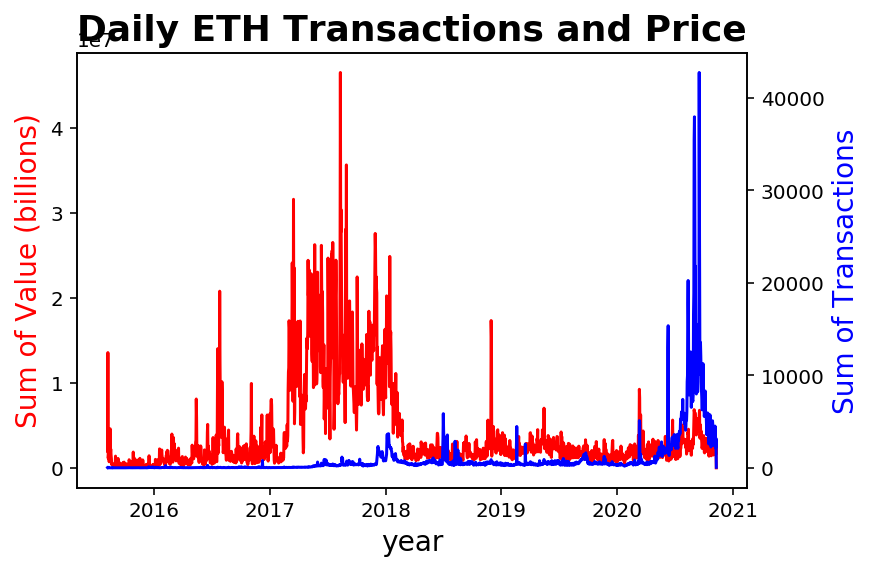
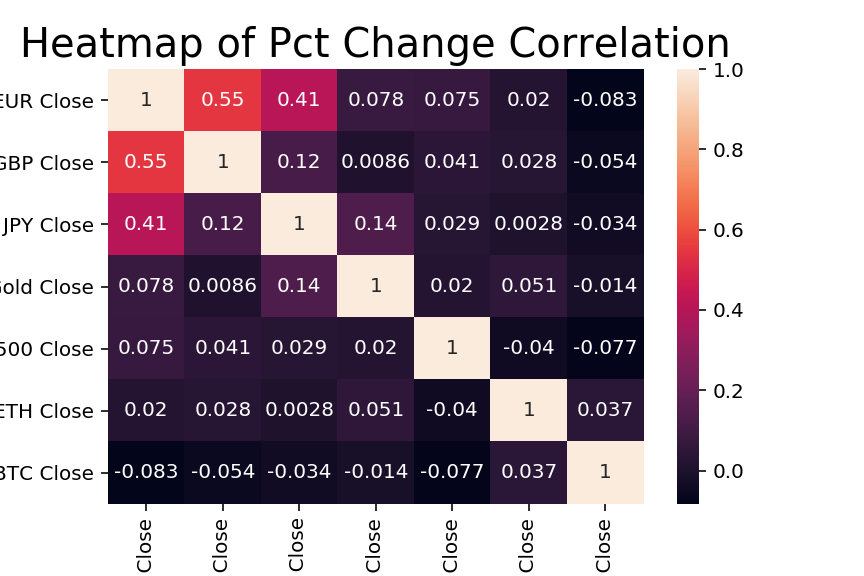
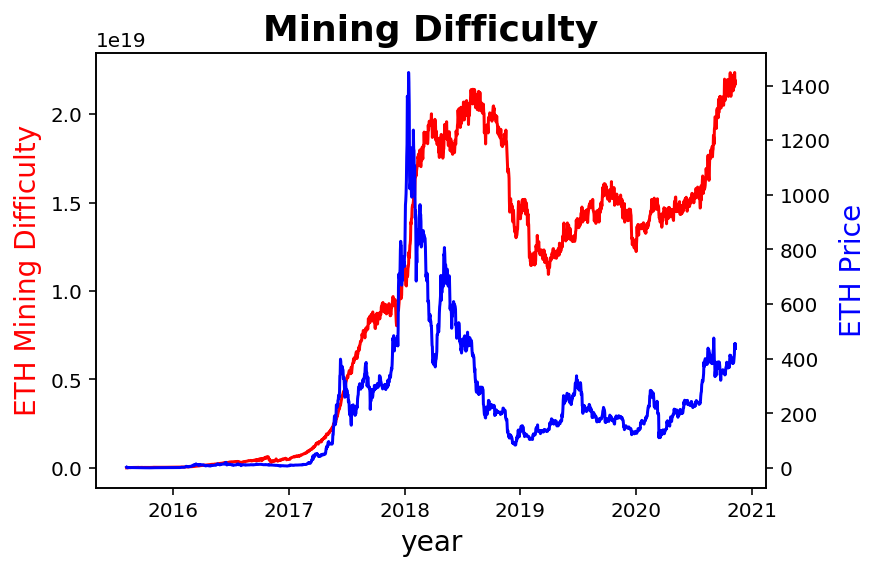
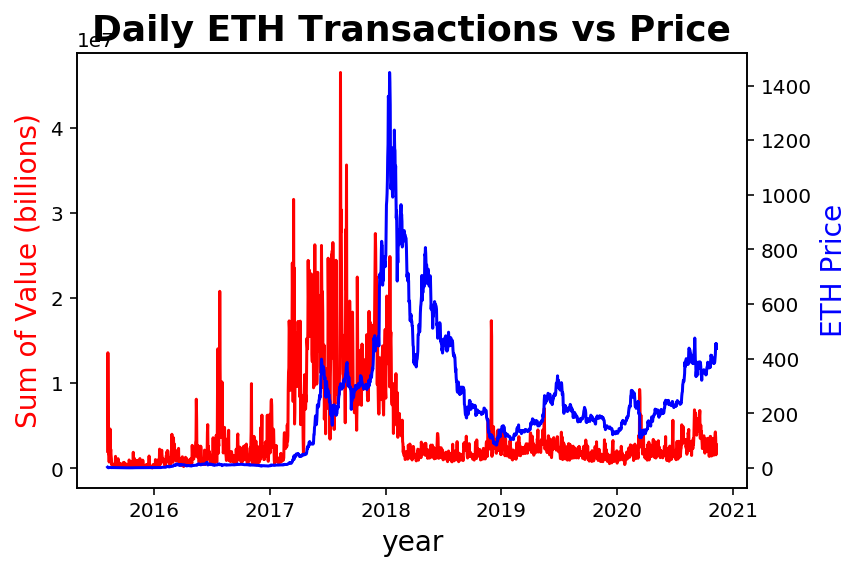
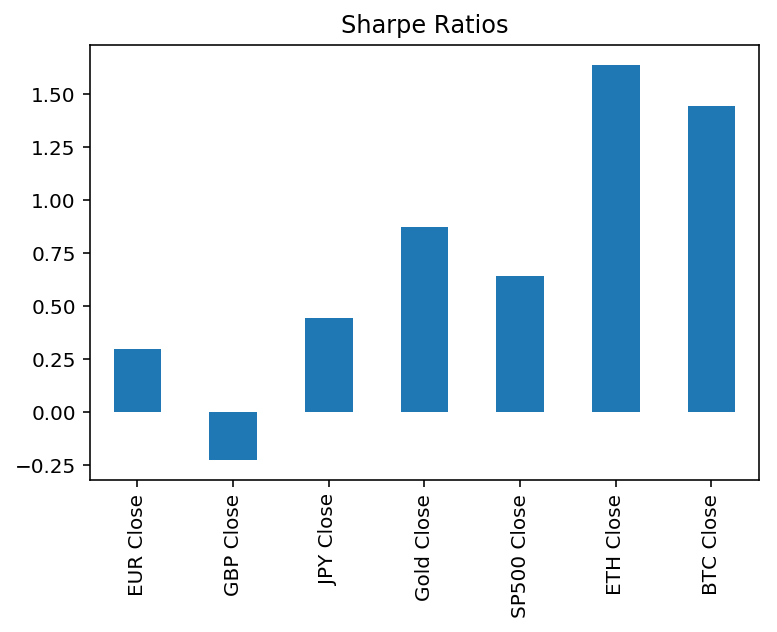

In [78]:
dashboard.servable()

In [79]:
dashboard.show()

Launching server at http://localhost:53510
